<a href="https://colab.research.google.com/github/MohamamdAghaei/Acea-Smart-Water-Analytics/blob/main/Big_Data_project_Water_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importig and understanding data**

In [14]:
import pandas as pd
import seaborn as sns
from datetime import datetime, date

In [15]:
#Reading dataset
df = pd.read_csv('/content/lakes_fe.csv')

In [16]:
#Checking shape and size of the dataset
df.shape

(6603, 5)

In [17]:
df.head()

,Date,Mean_Rainfall,Mean_Temp,Actual_Flow_Rate,Actual_Lake_Level
0,0,2.857312,14.530141,2.578255,249.606745
1,1,2.857312,14.530141,2.578255,249.606745
2,2,2.857312,14.530141,2.578255,249.606745
3,3,2.857312,14.530141,2.578255,249.606745
4,4,2.857312,14.530141,2.578255,249.606745


In [18]:
#Finfing information and simultaneously finding Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               6603 non-null   int64  
 1   Mean_Rainfall      6603 non-null   float64
 2   Mean_Temp          6603 non-null   float64
 3   Actual_Flow_Rate   6603 non-null   float64
 4   Actual_Lake_Level  6603 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 258.1 KB


# **Preprocessing**

In [21]:
#Checking missing values
df.isnull().sum()

,0
Date,0
Mean_Rainfall,0
Mean_Temp,0
Actual_Flow_Rate,0
Actual_Lake_Level,0


In [19]:
#Cheking duplicate roes
print(df.duplicated().sum())

0


In [20]:
# Convert the 'Date' column to datetime format
# Assuming day 0 is '01/01/2006'
start_date = datetime(2006, 1, 1)
df['Date'] = start_date + pd.to_timedelta(df['Date'], unit='D')

# Display the DataFrame
df.head()

,Date,Mean_Rainfall,Mean_Temp,Actual_Flow_Rate,Actual_Lake_Level
0,2006-01-01,2.857312,14.530141,2.578255,249.606745
1,2006-01-02,2.857312,14.530141,2.578255,249.606745
2,2006-01-03,2.857312,14.530141,2.578255,249.606745
3,2006-01-04,2.857312,14.530141,2.578255,249.606745
4,2006-01-05,2.857312,14.530141,2.578255,249.606745


# **EDA**

In [ ]:
import matplotlib.pyplot as plt

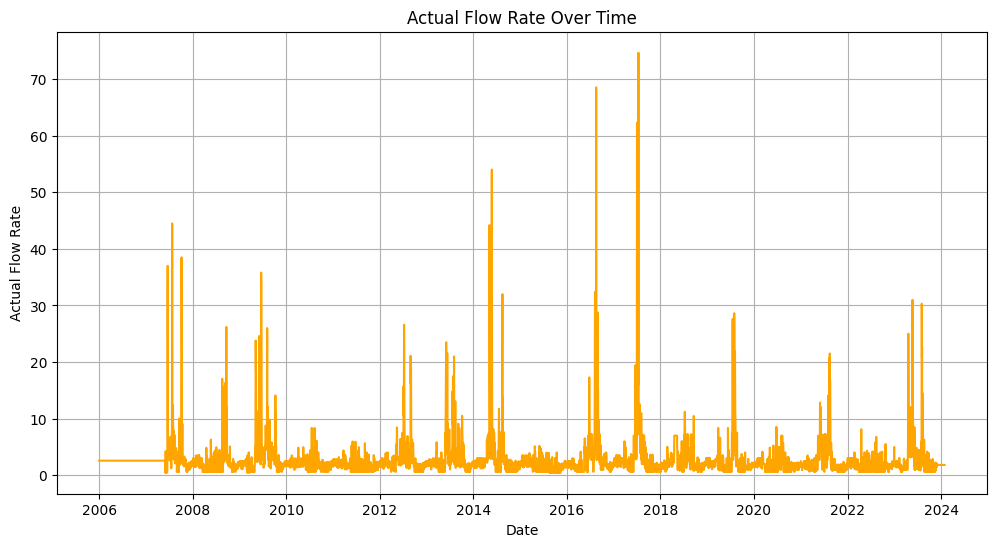

In [24]:
# plotting Date and Actual_Flow_Rate and the color orange

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Actual_Flow_Rate'], color='orange')
plt.xlabel('Date')
plt.ylabel('Actual Flow Rate')
plt.title('Actual Flow Rate Over Time')
plt.grid(True)
plt.show()


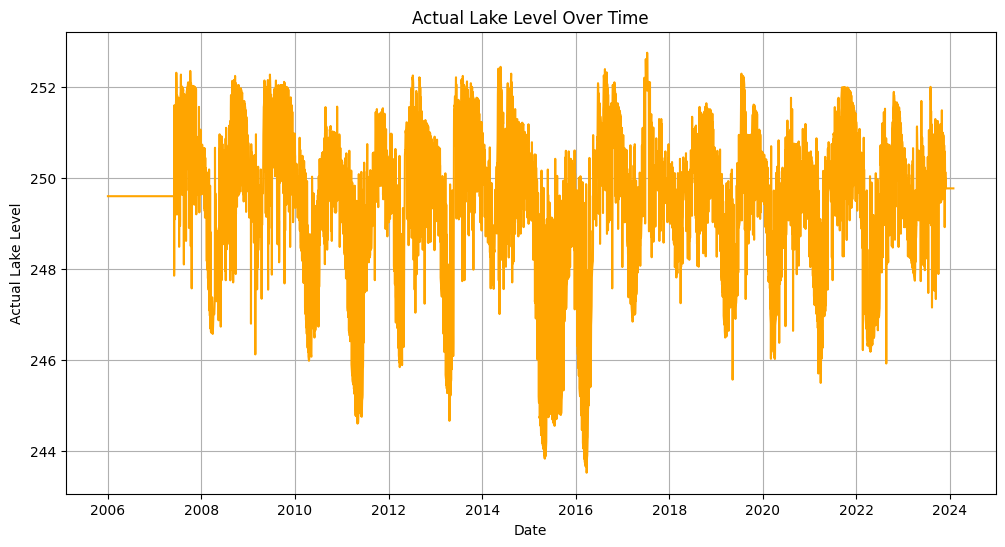

In [25]:
#plottin Date and Actual_Lake_Level and the color orange

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Actual_Lake_Level'], color='orange')
plt.xlabel('Date')
plt.ylabel('Actual Lake Level')
plt.title('Actual Lake Level Over Time')
plt.grid(True)
plt.show()

**Lake Flow Plots**

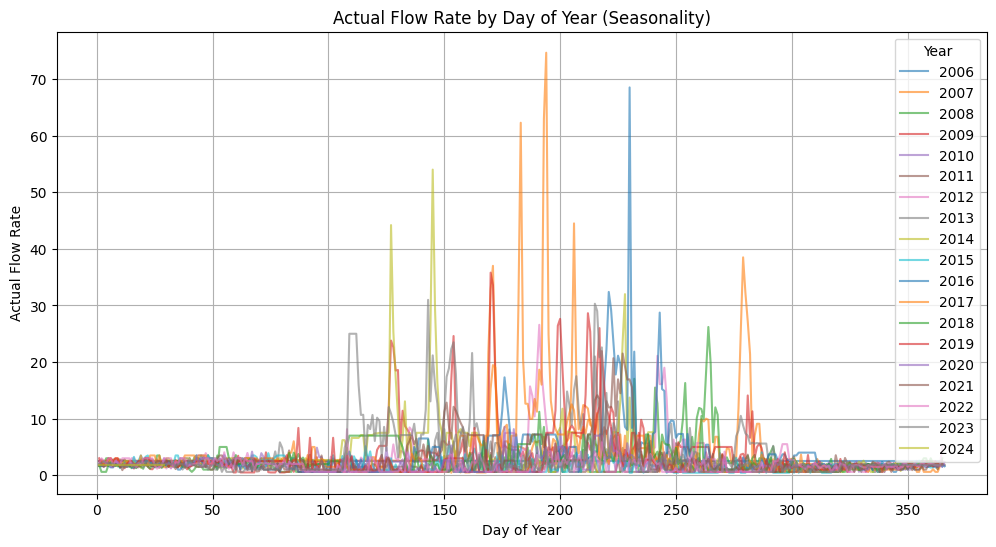

In [43]:
df['year'] = df['Date'].dt.year
df['day_of_year'] = df['Date'].dt.dayofyear

plt.figure(figsize=(12, 6))

for year in df['year'].unique():
    year_data = df[df['year'] == year]
    plt.plot(year_data['day_of_year'], year_data['Actual_Flow_Rate'], label=str(year))

plt.xlabel('Day of Year')
plt.ylabel('Actual Flow Rate')
plt.title('Actual Flow Rate Seasonality by Year')
plt.legend()
plt.grid(True)
plt.show()

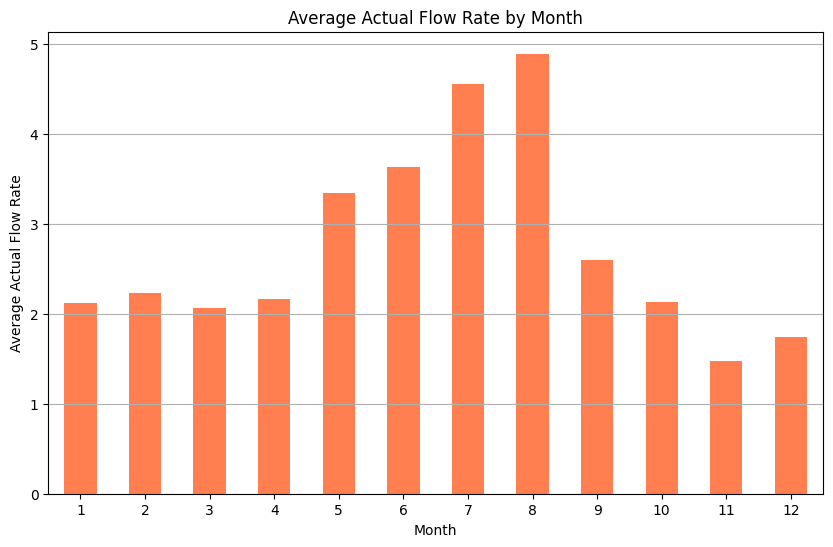

In [48]:
# Extract month
df['month'] = df['Date'].dt.month

# Group by month and calculate the mean Actual_Flow_Rate
monthly_flow_rate = df.groupby('month')['Actual_Flow_Rate'].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
monthly_flow_rate.plot(kind='bar', color='coral')
plt.xlabel('Month')
plt.ylabel('Average Actual Flow Rate')
plt.title('Average Actual Flow Rate by Month')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

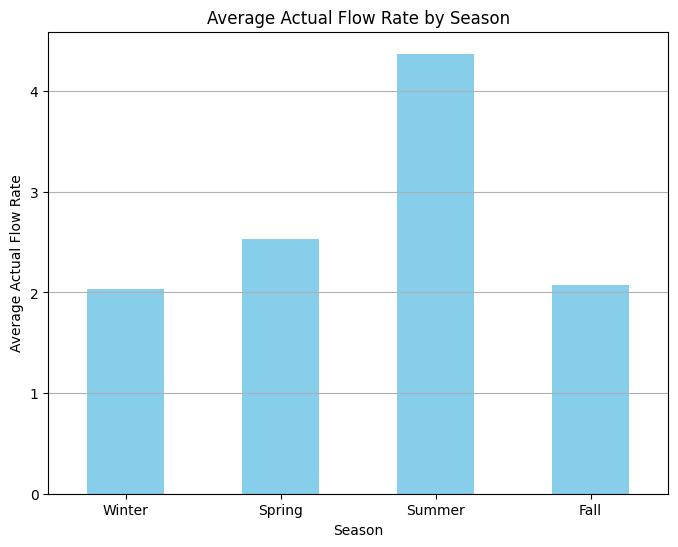

In [40]:
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Date'].apply(get_season)

# Group by season and calculate the mean Actual_Flow_Rate
seasonal_flow_rate = df.groupby('Season')['Actual_Flow_Rate'].mean()

# Define the order of seasons for the plot
season_order = ['Winter', 'Spring', 'Summer', 'Fall']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
seasonal_flow_rate.reindex(season_order).plot(kind='bar', color='skyblue')
plt.xlabel('Season')
plt.ylabel('Average Actual Flow Rate')
plt.title('Average Actual Flow Rate by Season')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Year with the highest average flow rate: 2007 (3.85)
Year with the lowest average flow rate: 2011 (1.68)


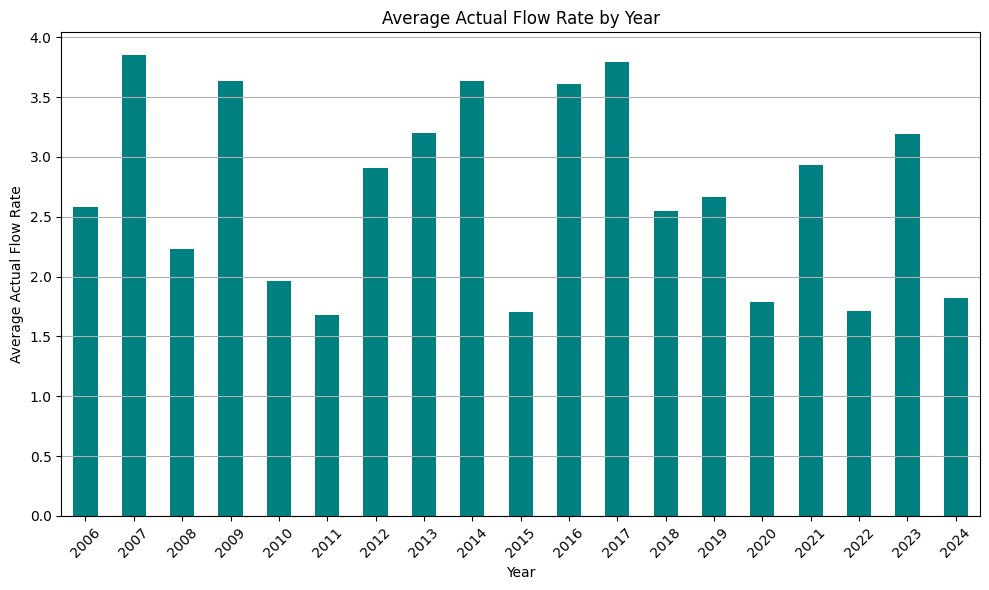

In [45]:
# Group by year and calculate the mean Actual_Flow_Rate
yearly_flow_rate = df.groupby('year')['Actual_Flow_Rate'].mean()

# Find the year with the highest and lowest average flow rate
year_highest_rate = yearly_flow_rate.idxmax()
year_lowest_rate = yearly_flow_rate.idxmin()

print(f"Year with the highest average flow rate: {year_highest_rate} ({yearly_flow_rate.max():.2f})")
print(f"Year with the lowest average flow rate: {year_lowest_rate} ({yearly_flow_rate.min():.2f})")

# Optional: Plotting the yearly average flow rate for better visualization
plt.figure(figsize=(10, 6))
yearly_flow_rate.plot(kind='bar', color='teal')
plt.xlabel('Year')
plt.ylabel('Average Actual Flow Rate')
plt.title('Average Actual Flow Rate by Year')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Lake Level plots**

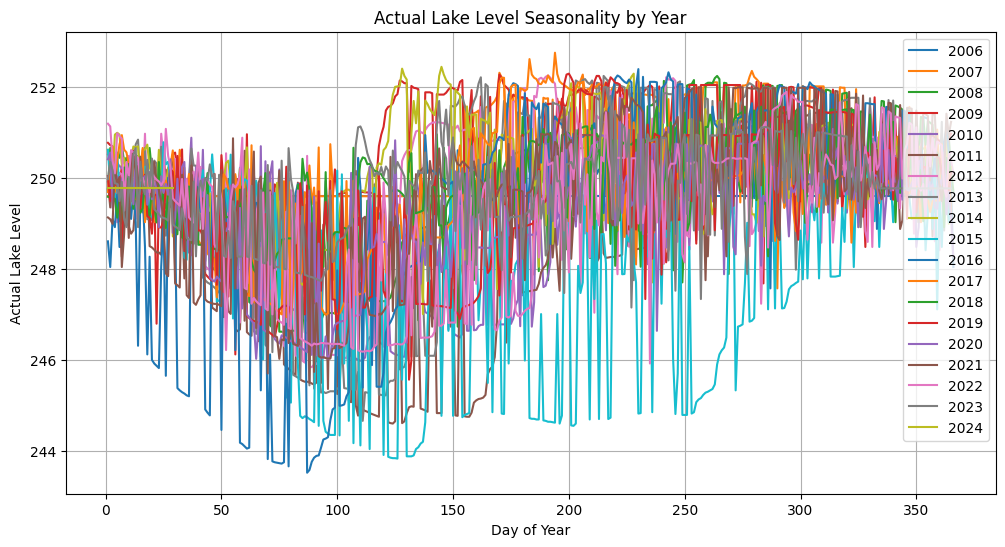

In [51]:
#make plot of Actual_Lake_Level based on Date for seasonality all the years
df['year'] = df['Date'].dt.year
df['day_of_year'] = df['Date'].dt.dayofyear

plt.figure(figsize=(12, 6))

for year in df['year'].unique():
    year_data = df[df['year'] == year]
    plt.plot(year_data['day_of_year'], year_data['Actual_Lake_Level'], label=str(year))

plt.xlabel('Day of Year')
plt.ylabel('Actual Lake Level')
plt.title('Actual Lake Level Seasonality by Year')
plt.legend()
plt.grid(True)
plt.show()

Year with the maximum difference in Actual_Lake_Level: 2016 (Difference: 8.87)


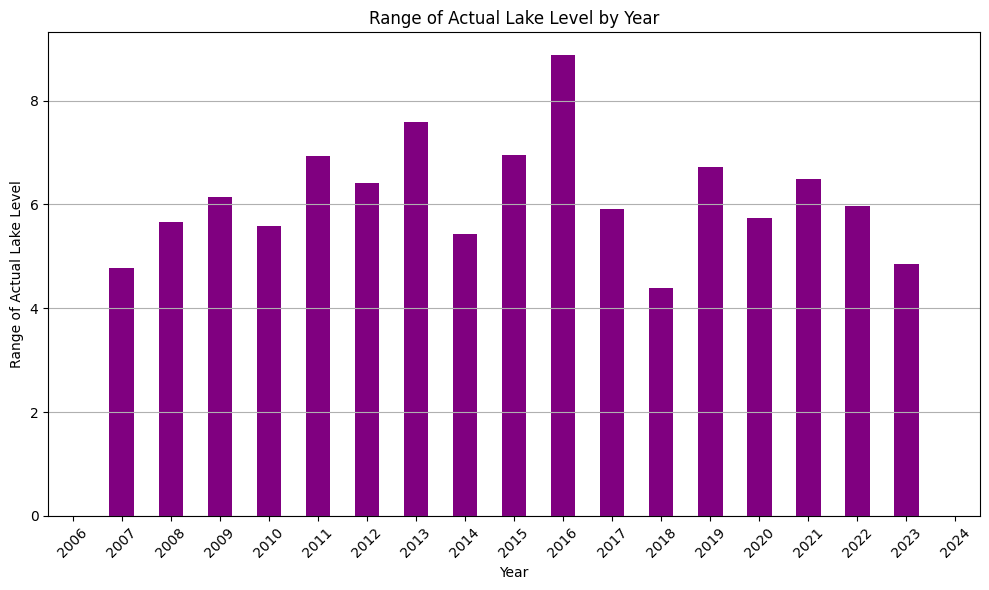

In [64]:
# Calculate the range (max - min) of 'Actual_Lake_Level' for each year
yearly_level_range = df.groupby('year')['Actual_Lake_Level'].max() - df.groupby('year')['Actual_Lake_Level'].min()

# Find the year with the maximum difference
year_max_diff = yearly_level_range.idxmax()
max_diff_value = yearly_level_range.max()

print(f"Year with the maximum difference in Actual_Lake_Level: {year_max_diff} (Difference: {max_diff_value:.2f})")

# Optional: Plotting the yearly level range
plt.figure(figsize=(10, 6))
yearly_level_range.plot(kind='bar', color='purple')
plt.xlabel('Year')
plt.ylabel('Range of Actual Lake Level')
plt.title('Range of Actual Lake Level by Year')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

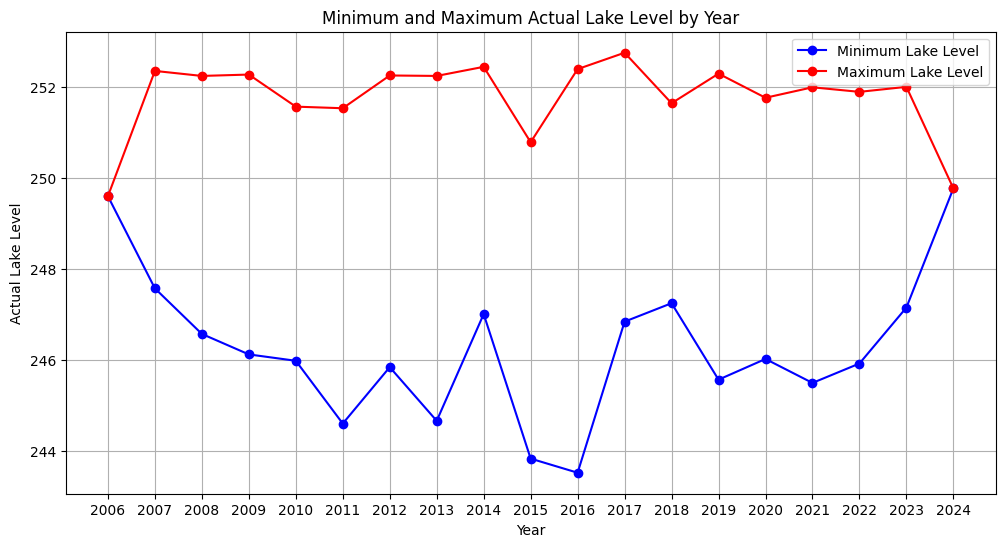

Minimum and Maximum Actual_Lake_Level for each year:
             min         max
year                        
2006  249.606745  249.606745
2007  247.581000  252.360000
2008  246.580000  252.250000
2009  246.130000  252.280000
2010  245.990000  251.575000
2011  244.610000  251.540000
2012  245.850000  252.260000
2013  244.670000  252.250000
2014  247.016667  252.450000
2015  243.840000  250.793333
2016  243.530000  252.400000
2017  246.850000  252.760000
2018  247.255000  251.650000
2019  245.575000  252.300000
2020  246.030000  251.770000
2021  245.503333  252.000000
2022  245.930000  251.900000
2023  247.160000  252.010000
2024  249.778750  249.778750


In [67]:
# Group by year and calculate the minimum and maximum 'Actual_Lake_Level'
yearly_level_stats = df.groupby('year')['Actual_Lake_Level'].agg(['min', 'max'])

# Plotting the minimum and maximum lake levels for each year
plt.figure(figsize=(12, 6))

plt.plot(yearly_level_stats.index, yearly_level_stats['min'], marker='o', linestyle='-', label='Minimum Lake Level', color='blue')
plt.plot(yearly_level_stats.index, yearly_level_stats['max'], marker='o', linestyle='-', label='Maximum Lake Level', color='red')

plt.xlabel('Year')
plt.ylabel('Actual Lake Level')
plt.title('Minimum and Maximum Actual Lake Level by Year')
plt.legend()
plt.grid(True)
plt.xticks(yearly_level_stats.index) # Ensure all years are shown on the x-axis
plt.show()

# Print the min and max lake levels for each year
print("Minimum and Maximum Actual_Lake_Level for each year:")
print(yearly_level_stats)

**Rain fall and Temperature**

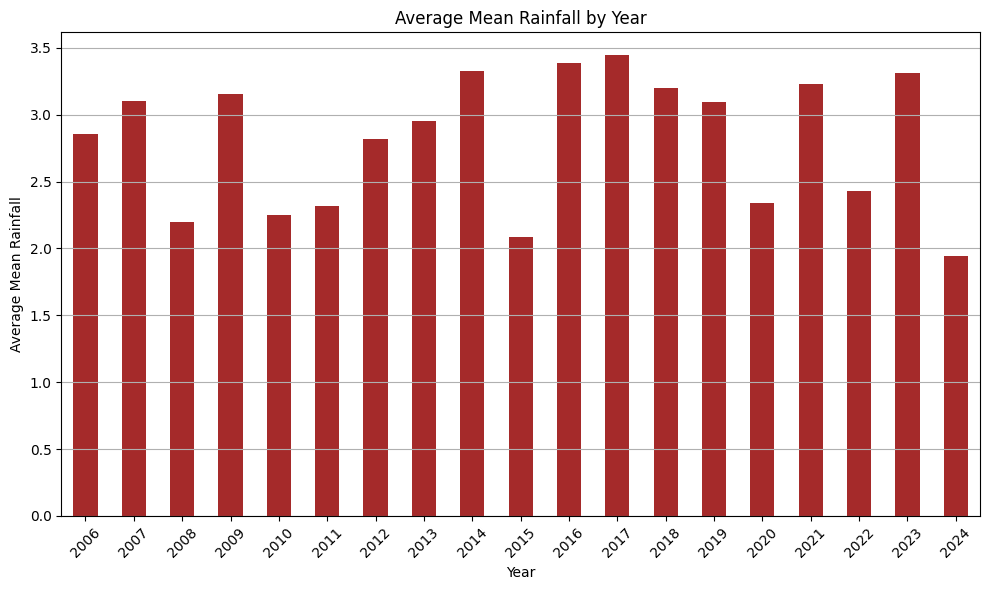

In [73]:
# Group by year and calculate the mean Rainfall
yearly_rainfall = df.groupby('year')['Mean_Rainfall'].mean()

# Plotting the yearly average rainfall
plt.figure(figsize=(10, 6))
yearly_rainfall.plot(kind='bar', color='brown')
plt.xlabel('Year')
plt.ylabel('Average Mean Rainfall')
plt.title('Average Mean Rainfall by Year')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

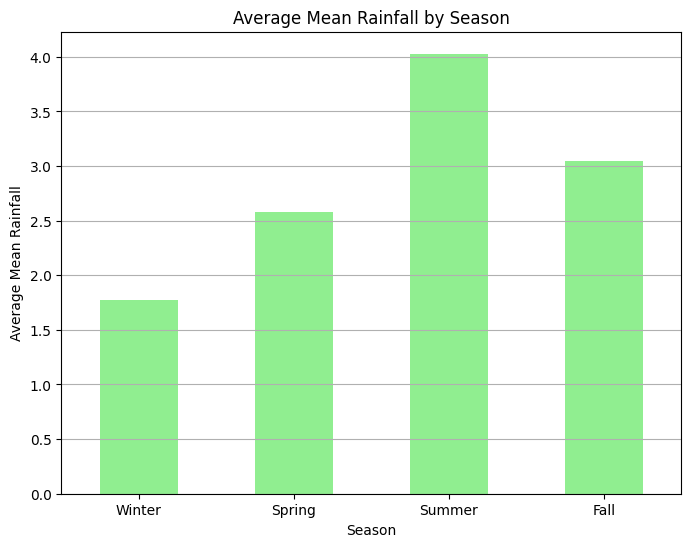

In [80]:
# Group by season and calculate the mean Rainfall
seasonal_rainfall = df.groupby('Season')['Mean_Rainfall'].mean()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
seasonal_rainfall.reindex(season_order).plot(kind='bar', color='lightgreen')
plt.xlabel('Season')
plt.ylabel('Average Mean Rainfall')
plt.title('Average Mean Rainfall by Season')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

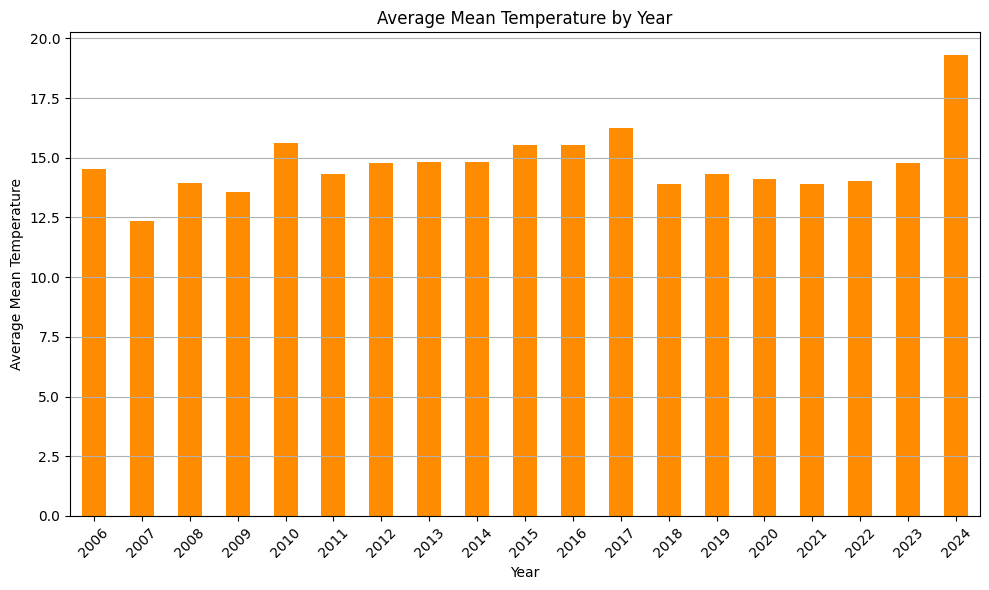

In [75]:
# Group by year and calculate the mean Mean_Temp
yearly_temp = df.groupby('year')['Mean_Temp'].mean()

# Plotting the yearly average temperature
plt.figure(figsize=(10, 6))
yearly_temp.plot(kind='bar', color='darkorange')
plt.xlabel('Year')
plt.ylabel('Average Mean Temperature')
plt.title('Average Mean Temperature by Year')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

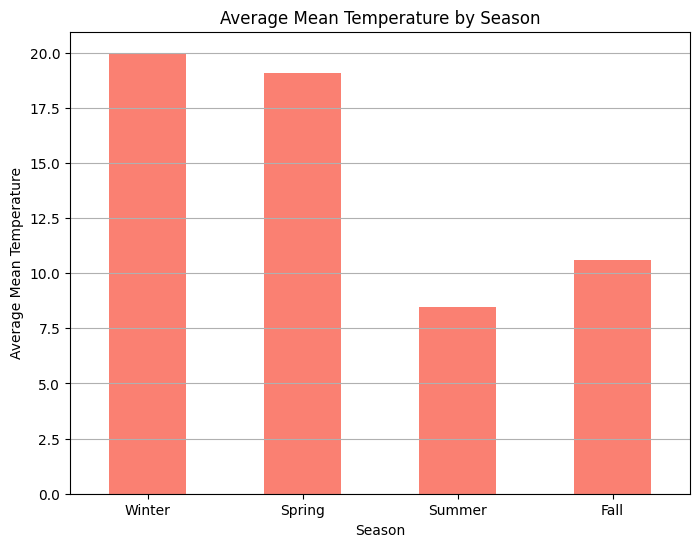

In [81]:
# Group by season and calculate the mean Mean_Temp
seasonal_temp = df.groupby('Season')['Mean_Temp'].mean()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
seasonal_temp.reindex(season_order).plot(kind='bar', color='salmon')
plt.xlabel('Season')
plt.ylabel('Average Mean Temperature')
plt.title('Average Mean Temperature by Season')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

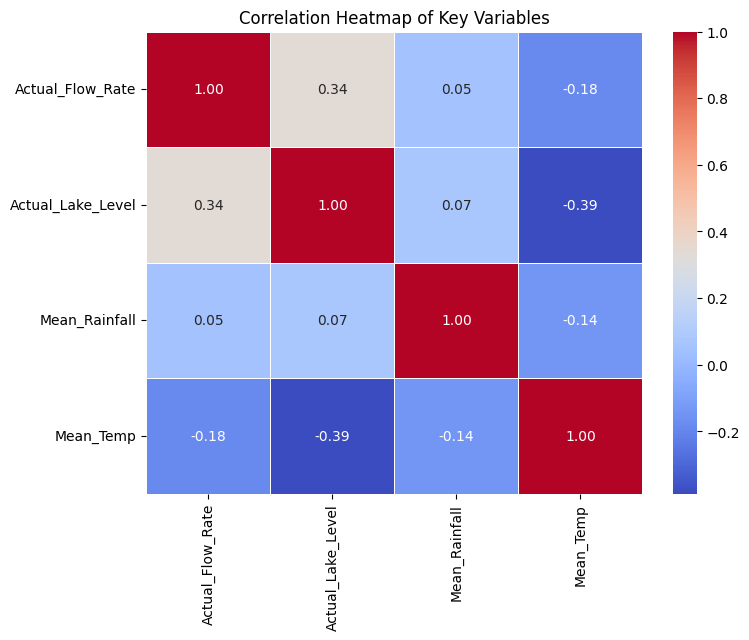

In [84]:
# Select the columns for the heatmap
correlation_columns = ['Actual_Flow_Rate', 'Actual_Lake_Level', 'Mean_Rainfall', 'Mean_Temp']
df_corr = df[correlation_columns]

# Calculate the correlation matrix
correlation_matrix = df_corr.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Key Variables')
plt.show()